# *MOVIE*  *RECOMMENDATION* 


#Introduction

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where algorithms can help viewers find great titles from tens of thousands of options.





This notebook aims to construct a recommendation algorithm based on content or collaborative filtering which will be capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

This will be done by importing necesarry libraries as well as the useful datasets needed for prediction.Some exploratory data analysis will be done to get insights of the datasets before diving into the recommendation algorithm.




An easy-to-use python scikit library called Surprise will be used for building and analyzing the reccommender sytem.The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine and this engine deals with explicit rating data.

Amongst other things, the engine can do the following:


*   Provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others.


*   Provide tools to evaluate, analyse and compare the algorithms performance


*   Make it easy to implement new algorithm ideas






The dataset used in this notebbok is the MovieLens dataset which has been enriched with additional data, and resampled for fair evaluation purposes.

# Problem statement
Construct a recommendation algorithm that is capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences



# Aim

Providing an accurate and robust solution with an rmse that is lower that 0.85 to the movie rating prediction.

# Scope

The scope of the project will be to analyse a given dataset. These dataset will then be used to train an unsupervised machine learning technique to solve the problem.

#Version Control Setup

##Start Comet Experiment

In [1]:
!pip install comet_ml


     |████████████████████████████████| 225kB 2.7MB/s 
     |████████████████████████████████| 204kB 8.8MB/s 
     |████████████████████████████████| 419kB 10.9MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=163b676a68838cf851d04ffa8369c395bc6594a11e840568c653c6836670944f
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [2]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="kyaDe1YHDUV60KbpzF3dVpIuk",
                        project_name="general", workspace="rachel-ramonyai")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/rachel-ramonyai/general/7bbb59f0744340e2bec16b205043eea8



# Technical Notebook Setup

In [3]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 322kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670911 sha256=52303dcc3958c5378ba04947f8e3051a6f4e2f9594b74505c4ea0382fdc24e43
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [4]:
import pandas as pd
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Metrics Measurement
from surprise import accuracy
from surprise.model_selection import cross_validate

#Surprise Models
from surprise import SVD,SVDpp
from surprise import Dataset,Reader

#Data split
from surprise.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Datasets

###Description

The dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.



###Supplied Files


There are a total of 8 csv files supplied and in this notebook we only use 3 of them. These are:

train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


movies.csv - Movie information is contained in this file;includes title and genre 


test.csv - The test split of the dataset. Contains user and movie IDs with no rating data



# Data and Variable Setup


This section loads and checks the data needed to run this notebook.

To ensure the notebook runs without any error, the relevent csv files need to be present in the notebook's directory before running the next cell.

The code will load the datasets into the notebook and display the information of the data, check if there are gaps or blanks in the dataset and check for the balance in the overal dataset.

In [5]:
train = pd.read_csv("train.csv")
movies = pd.read_csv("movies.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [6]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train.drop('timestamp',1)[['userId', 'movieId', 'rating']], reader)

#Exploratory Data Analysis

The following section of the notebook focuses on understanding the data that was provided. The data will be loaded into the notebook and assessed accordingly. This will assist in making decisions regarding which insights we can derive from the dataset.

It is important to understand the data that is being worked with for the project. Many calculated insights can be derived from the dataset that can provide usable information within the marketing sector.


In [7]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
train.movieId.nunique(),train.userId.nunique()

(48213, 162541)

Although the train dataset has 10 000 038 observations, there are 48 213 unique  movies and 162 541 unique users in this data set meaning there is a duplication of movieIds and userIds.

##Visualising the data and making observations
In this section, we will make observations of the data after we:

1. Visualise the distribution of the ratings(0.5-5) of the movies on a bar chart
2. Visualise the distribution for the number of ratings per movie
3. View the top 10 most frequently rated movies
4. Visualise the distribution for the number of ratings per user

The graph below shows the distribution of the ratings. With 0.5 as the minimum rating and 5 as the highest rating.

In [32]:
pf =  pd.merge(train, movies, on= 'movieId')

In [9]:
train.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings Distribution')

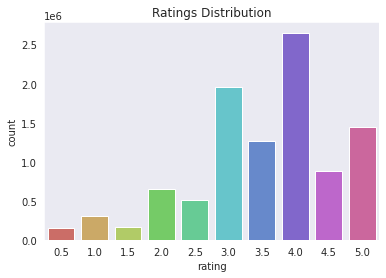

In [91]:
sns.countplot(x = 'rating', data = train, palette="hls")
plt.title("Ratings Distribution")

###Observations made


It is clear to see that the dataset is highly unbalanced. Therefore we may need to apply methods to balance the data. However, this will impact the training of the machine learning model and will be dealt with later in the notebook.

The majority of movies (82%) are rated 3 and higher with 4 being the most frequent rating and 0.5 being the least.

##Merging the datasets

For further data analysis, we merge the movies dataset and the train dataset since they have a common variable that we can merge them on (movieId)

In [75]:
pf =  pd.merge(train, movies, on= 'movieId')
pf.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [76]:
len(pf)

10000038

Having the merged dataset allows for an easy reading of movieId with the title alongside it. With this, one is able to associate an Id with the title as well as read grouped data that we will explore in more detail below.

In [62]:
ratings = pd.DataFrame(pf.groupby(['movieId','title'])['rating'].mean())
ratings = ratings.rename(columns={'rating': 'mean_rating'})
ratings['Num of ratings'] = pd.DataFrame(pf.groupby(['movieId','title'])['rating'].count())
ratings.head()

,,mean_rating,Num of ratings
movieId,title,,
1,Toy Story (1995),3.889971,23062
2,Jumanji (1995),3.263414,9654
3,Grumpier Old Men (1995),3.132325,4727
4,Waiting to Exhale (1995),2.878099,968
5,Father of the Bride Part II (1995),3.059165,4648


The above dataframe shows the average/mean rating for each movie as well as the number of ratings for that particular movie.

####Distribution of the average ratings per movie



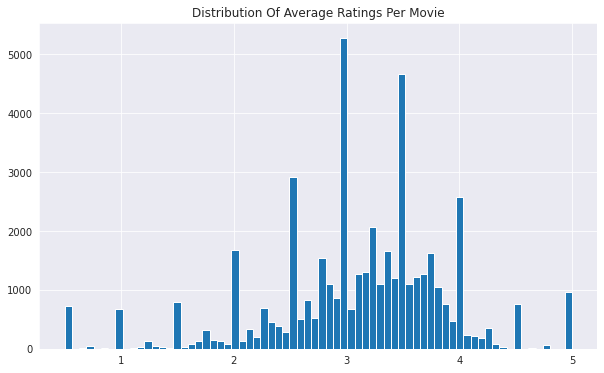

In [60]:
#Distribution of the average ratings per movie
fig = plt.figure(figsize=(10,6))
plt.title('Distribution Of Average Ratings Per Movie')
ratings['mean_rating'].hist(bins = 70)

####Distribution of the number of ratings per movie

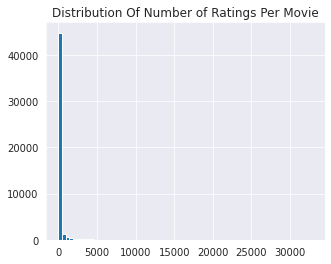

In [59]:
#Distribution of the number of ratings per movie
fig = plt.figure(figsize=(5,4))
plt.title('Distribution Of Number of Ratings Per Movie')
ratings['Num of ratings'].hist(bins = 70)
fig.show()

####Joint plot of ratings and number of ratings

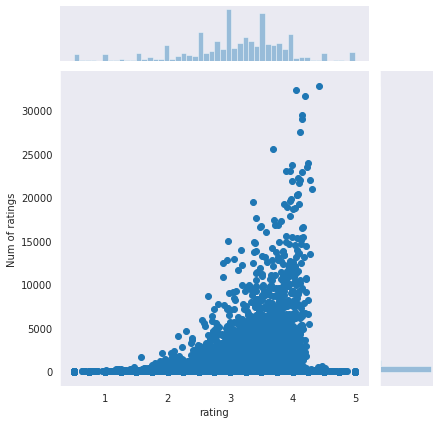

In [53]:
sns.set_style('dark')
sns.jointplot(x ='rating' , y ='Num of ratings' , data = rating)

The 10 most rated movies in the dataset are shown below with the movie Shawshank Redemption at number 1 with 32 831 ratings.It should also be noted that these top 10 most rated movies have more than 20 000 ratings.

In [77]:
pf.groupby(['movieId','title'])['rating'].count().sort_values(ascending = False).head(10)

movieId  title                                    
318      Shawshank Redemption, The (1994)             32831
356      Forrest Gump (1994)                          32383
296      Pulp Fiction (1994)                          31697
593      Silence of the Lambs, The (1991)             29444
2571     Matrix, The (1999)                           29014
260      Star Wars: Episode IV - A New Hope (1977)    27560
480      Jurassic Park (1993)                         25518
527      Schindler's List (1993)                      24004
110      Braveheart (1995)                            23722
2959     Fight Club (1999)                            23536
Name: rating, dtype: int64

###User engagement with the movies

Below we look at how the users engaged with the movies in terms of rating.

In [65]:
#Dataframe of number users and number of movies they rated
Users = pd.DataFrame(pf.groupby('userId')['movieId'].count())
Users = Users.rename(columns={'movieId': 'Num_movies'})
Users.head()

,Num_movies
userId,
1,28
2,72
3,251
4,89
5,35


Text(0.5, 1.0, 'Distribution of users that rated less than 10 movies')

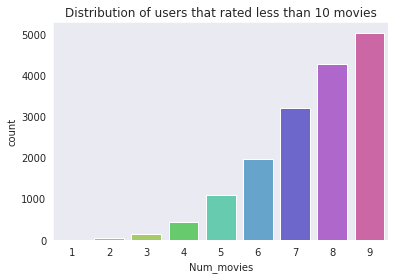

In [88]:
less_than_10 = Users[Users['Num_movies']<10]

#Users with less than 10 ratings
sns.countplot(x = 'Num_movies', data = less_than_10, palette="hls")
plt.title("Distribution of users that rated less than 10 movies")

In [84]:
(len(less_than_10)/len(Users))*100

9.949489667222423

The above graph shows the distribution of users that rated less than 10 movies.These users make  9.95% which makes them few.

####Distribution of the number of movies per user

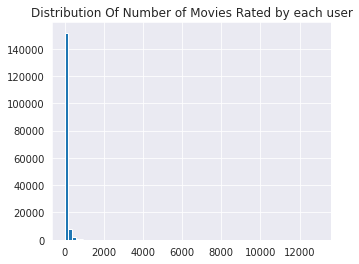

In [79]:
#Distribution of the number of movies per user
fig = plt.figure(figsize=(5,4))
plt.title('Distribution Of Number of Movies Rated by each user')
Users['Num_movies'].hist(bins = 70)
fig.show()

The top 10 most rating users are shown below. We see that user with Id 72 215 has rated the most movies 12 952 and there is a significant difference between top user and the second user. The top user has rated 9 272 more times than the second most rating user.

In [89]:
#How many movies did each user rate
pf.groupby('userId')['rating'].count().sort_values(ascending = False).head(10)

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
109731     2671
49403      2670
92046      2579
110971     2288
30879      2284
Name: rating, dtype: int64

The bottom users by rating are as follows:

In [90]:
pf.groupby('userId')['rating'].count().sort_values(ascending = False).tail(10)

userId
138028    2
113147    2
153150    2
120862    2
79087     1
55362     1
121071    1
127098    1
53640     1
105714    1
Name: rating, dtype: int64

###Train Test Split

Here we divide our data into training data and testing data of 2%

In [ ]:
train_data,test_data = train_test_split(data,test_size=0.02,random_state=42)

###Prediction 

Here we a use popular latent factor model named Singular Value Decomposition (SVD).

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD(random_state=42)

#Fit our SVD
algo.fit(train_data)

In [ ]:
predictions = algo.test(test_data)
pd.DataFrame(predictions)

To calculate the accuracy rmse for our predictions we use the accuracy. function.

In [ ]:
accuracy.rmse(predictions)

In [ ]:
accuracy.mae(predictions)

#Ending comet experiment

In [ ]:
metrics = {"rmse": rmse,
           "mae": mae,
        
           }

In [ ]:
experiment.log_metrics(metrics)


In [ ]:
experiment.end()

#Analysis and Insights

What did you learn


More about recommender systems

# Project conclusion

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

Insights found:









Model building and Training:











Model building and Training:


Submission findings:

The achieved score on Kaggle is 0.80344 which happened to be the best score

# Project Improvements:

The team identified multiple issues as they progressed through the project which allowed us to make a note of improvements that can be made when redoing the project:

Mine more data, this will avoid the overfitting issue
Apply more insight analysis such as wordclouds with more depth as well as entity recognition. This can potentially provide more information about the users of this dataset
Train models successfully with the extended_df (this failed and was discarded for alternative methods)
Explore deep learning and determine if this problem would be a good fit for such a machine learning technique.
Increased hardware performance will allow for the code in the Appendix to be run, this may result in better metrics.
When mining data, it would be useful to also obtain location tags and time stamps of the movies.